In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from verstack.stratified_continuous_split import scsplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cc_train = pd.read_csv('./integrated_data/CAMCAN_train.csv')
cc_test = pd.read_csv('./integrated_data/CAMCAN_test.csv')

hcp = pd.read_csv('./integrated_data/HCP.csv')

ixi = pd.read_csv('./integrated_data/thickness_area_sub.csv')

# CAMCAN Data Set

In [33]:
print('train shape : ', cc_train.shape)
print('test shape : ', cc_test.shape)

train shape :  (500, 155)
test shape :  (101, 155)


In [34]:
cc_train

,ID,Age,Sex,lh_bankssts_area,lh_caudalanteriorcingulate_area,lh_caudalmiddlefrontal_area,lh_cuneus_area,lh_entorhinal_area,lh_fusiform_area,lh_inferiorparietal_area,...,Lput,Rput,Lpal,Rpal,Lhippo,Rhippo,Lamyg,Ramyg,Laccumb,Raccumb
0,CC110045,24,2,1077,756,2028,1465,541,3344,4584,...,5193.4,5386.9,2167.9,2082.4,4196.3,4104.2,1398.1,1655.9,398.6,615.8
1,CC110069,28,2,1127,546,2416,1442,640,3127,4383,...,4432.5,4527.6,2085.5,2136.6,4383.4,4560.6,1358.4,1838.4,342.0,505.3
2,CC110087,28,2,848,434,2281,1410,501,3399,4225,...,4549.0,4698.3,2015.4,2026.8,4204.4,4317.4,1742.2,1816.4,241.2,446.1
3,CC110098,23,1,1102,673,2857,1736,561,3061,4443,...,5239.7,5335.2,1884.4,1851.4,4392.6,4324.6,1867.2,1814.6,446.0,536.4
4,CC110126,22,2,922,754,2345,1342,545,3251,5275,...,4875.8,5388.5,1994.7,2069.7,4322.5,4240.6,1782.2,1862.0,436.9,523.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CC722542,79,1,977,701,2207,1382,371,3849,4662,...,4414.0,4423.0,1958.9,1770.1,3915.4,3883.8,1698.8,1649.2,372.7,474.5
496,CC722651,79,2,806,663,2022,1369,450,2438,3680,...,3712.3,3750.7,1818.6,1998.1,3939.6,4056.2,1395.6,1496.4,223.4,423.3
497,CC722891,84,2,869,639,2142,1377,512,3118,4511,...,3631.7,3621.3,1861.9,1725.3,2805.4,2798.2,1227.4,1342.3,250.1,466.9
498,CC723197,80,2,892,506,2047,1267,434,2803,4564,...,4756.8,4647.2,2313.0,2324.4,3688.3,3627.7,1177.4,1487.6,268.7,385.3


(array([15., 50., 57., 54., 61., 52., 54., 61., 63., 33.]),
 array([18., 25., 32., 39., 46., 53., 60., 67., 74., 81., 88.]),
 <a list of 10 Patch objects>)

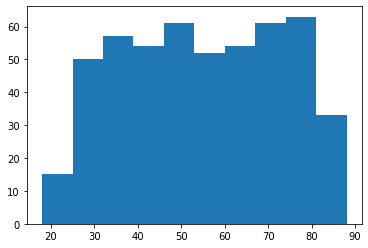

In [35]:
train_label = cc_train['Age']
plt.hist(train_label)

In [36]:
#Maximum Value
print('Max : ', np.max(train_label))

#Minimum Value
print('Min : ', np.min(train_label))

Max :  88
Min :  18


In [37]:
np.median(train_label)

54.5

In [38]:
np.std(train_label)

18.248966655676707

In [39]:
def df_info_cc(df): 
    # Shape
    print('shape : ', df.shape)
    
    # DF가 바뀌면 이부분만 바뀐다.
    label = df['Age']
    # Minimum Value
    print('Min : {:.2f}'.format(np.min(label)))
    # Maximum Value
    print('Max : {:.2f}'.format( np.max(label)))

    print('Range : {:.2f} ~ {:.2f}'.format( np.min(label), np.max(label)))
    
    print('Median : {:.2f}'.format(np.median(label)))
    print('Standard Deviation : {:.2f}'.format(np.std(label)) )
    
    plt.title("Age Distribution")
    sns.histplot(data = df, x = 'Age')

shape :  (500, 155)
Min : 18.00
Max : 88.00
Range : 18.00 ~ 88.00
Median : 54.50
Standard Deviation : 18.25


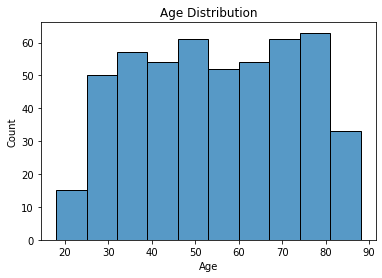

In [40]:
df_info_cc(cc_train)

shape :  (101, 155)
Min : 18.00
Max : 87.00
Range : 18.00 ~ 87.00
Median : 55.00
Standard Deviation : 17.43


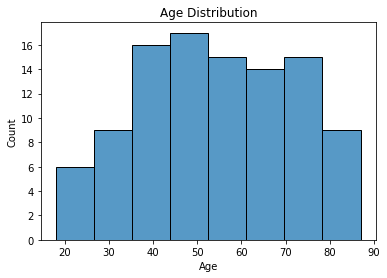

In [41]:
df_info_cc(cc_test)

,ID,Age,Sex,lh_bankssts_area,lh_caudalanteriorcingulate_area,lh_caudalmiddlefrontal_area,lh_cuneus_area,lh_entorhinal_area,lh_fusiform_area,lh_inferiorparietal_area,...,Lput,Rput,Lpal,Rpal,Lhippo,Rhippo,Lamyg,Ramyg,Laccumb,Raccumb
0,CC110045,24,2,1077,756,2028,1465,541,3344,4584,...,5193.4,5386.9,2167.9,2082.4,4196.3,4104.2,1398.1,1655.9,398.6,615.8
1,CC110069,28,2,1127,546,2416,1442,640,3127,4383,...,4432.5,4527.6,2085.5,2136.6,4383.4,4560.6,1358.4,1838.4,342.0,505.3
2,CC110087,28,2,848,434,2281,1410,501,3399,4225,...,4549.0,4698.3,2015.4,2026.8,4204.4,4317.4,1742.2,1816.4,241.2,446.1
3,CC110098,23,1,1102,673,2857,1736,561,3061,4443,...,5239.7,5335.2,1884.4,1851.4,4392.6,4324.6,1867.2,1814.6,446.0,536.4
4,CC110126,22,2,922,754,2345,1342,545,3251,5275,...,4875.8,5388.5,1994.7,2069.7,4322.5,4240.6,1782.2,1862.0,436.9,523.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CC722542,79,1,977,701,2207,1382,371,3849,4662,...,4414.0,4423.0,1958.9,1770.1,3915.4,3883.8,1698.8,1649.2,372.7,474.5
496,CC722651,79,2,806,663,2022,1369,450,2438,3680,...,3712.3,3750.7,1818.6,1998.1,3939.6,4056.2,1395.6,1496.4,223.4,423.3
497,CC722891,84,2,869,639,2142,1377,512,3118,4511,...,3631.7,3621.3,1861.9,1725.3,2805.4,2798.2,1227.4,1342.3,250.1,466.9
498,CC723197,80,2,892,506,2047,1267,434,2803,4564,...,4756.8,4647.2,2313.0,2324.4,3688.3,3627.7,1177.4,1487.6,268.7,385.3


# HCP Data Set

In [11]:
hcp

,ID,Age,Sex,FS_L_LatVent_Vol,FS_L_ThalamusProper_Vol,FS_L_Caudate_Vol,FS_L_Putamen_Vol,FS_L_Pallidum_Vol,FS_L_Hippo_Vol,FS_L_Amygdala_Vol,...,FS_R_Rostralanteriorcingulate_Area,FS_R_Rostralmiddlefrontal_Area,FS_R_Superiorfrontal_Area,FS_R_Superiorparietal_Area,FS_R_Superiortemporal_Area,FS_R_Supramarginal_Area,FS_R_Frontalpole_Area,FS_R_Temporalpole_Area,FS_R_Transversetemporal_Area,FS_R_Insula_Area
0,100206,27,1,5057,10426,4599,5941,1463,4896,1734,...,791,8627,8515,6315,4337,3522,356,500,384,2267
1,100307,27,2,3559,7787,3764,4983,1128,4140,1536,...,505,5702,6463,4538,3441,3613,257,412,375,2385
2,100408,33,1,3910,9097,3647,5622,1765,2571,1342,...,631,7092,7484,5367,3984,4144,298,410,421,2578
3,100610,27,1,4262,9613,4924,6690,1961,5608,1848,...,629,7027,7088,6820,3876,3730,298,393,337,2792
4,101006,35,2,4321,7838,3436,5726,1765,3925,1524,...,649,4672,5639,5032,3088,3416,257,471,336,2290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,992774,35,1,6613,8416,3756,5080,1188,4250,1473,...,777,5664,6563,4838,3367,3384,199,342,247,2241
1109,993675,29,2,4850,7477,3449,4874,1054,4571,1358,...,551,4961,6206,6121,3113,3187,258,449,288,2091
1110,994273,30,1,6310,8416,4236,5961,1364,4159,1627,...,817,5369,7111,5860,3389,3858,220,435,386,2821
1111,995174,25,1,4090,9334,4546,6769,1497,4616,1629,...,570,6393,6837,4741,3565,3819,329,407,273,2550


In [12]:
def df_info_hcp(df): 
    # Shape
    print('shape : ', df.shape)
    
    # DF가 바뀌면 이부분만 바뀐다.
    label = df['Age']
    # Minimum Value
    print('Min : {:.2f}'.format(np.min(label)))
    # Maximum Value
    print('Max : {:.2f}'.format( np.max(label)))

    print('Range : {:.2f} ~ {:.2f}'.format( np.min(label), np.max(label)))
    
    print('Median : {:.2f}'.format(np.median(label)))
    print('Standard Deviation : {:.2f}'.format(np.std(label)) )
    
    plt.title("Age Distribution")
    sns.histplot(data = df, x = 'Age')

shape :  (1113, 155)
Min : 22.00
Max : 37.00
Range : 22.00 ~ 37.00
Median : 29.00
Standard Deviation : 3.70


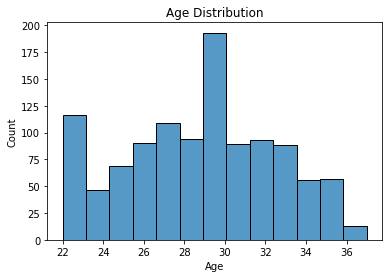

In [13]:
df_info_hcp(hcp)

In [14]:
y = hcp['Age']
X = hcp.drop('Age', axis = 1)

In [15]:
# 5 bins may be too few for larger datasets.
bins     = np.linspace(start=22, stop=37, num=5)
y_binned = np.digitize(y, bins, right=True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, stratify=y_binned, shuffle = True, random_state = 1)

In [16]:
hcp_train = pd.concat([X_train, y_train], axis =1)
hcp_test = pd.concat([X_test, y_test], axis =1)

shape :  (890, 155)
Min : 22.00
Max : 37.00
Range : 22.00 ~ 37.00
Median : 29.00
Standard Deviation : 3.70


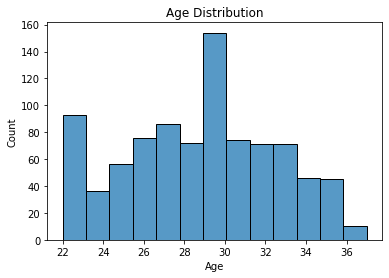

In [17]:
df_info_hcp(hcp_train)

shape :  (223, 155)
Min : 22.00
Max : 36.00
Range : 22.00 ~ 36.00
Median : 29.00
Standard Deviation : 3.69


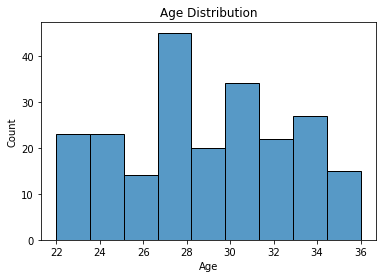

In [18]:
df_info_hcp(hcp_test)

In [19]:
hcp_train.to_csv('./integrated_data/hcp_train.csv')
hcp_test.to_csv('./integrated_data/hcp_test.csv')

# IXI Data Set

In [20]:
ixi = pd.read_csv('./integrated_data/thickness_area_sub.csv')
ixi = ixi.drop(['Unnamed: 0', 'ID'], axis =1)
ixi = ixi.dropna()
ixi

,SEX,HEIGHT,WEIGHT,AGE,scan_site,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,Left-Amygdala,Left-Accumbens-area,Right-Lateral-Ventricle,Right-Thalamus,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area
0,2.0,164.0,58.0,35.800137,Guys,2.377,2.562,2.708,1.869,3.093,...,1588.1,335.7,3533.4,8419.4,3395.6,5213.0,2046.0,4032.7,1555.4,510.6
1,1.0,175.0,70.0,38.781656,HH,2.523,2.061,2.473,1.699,3.347,...,2223.3,587.9,6042.3,8274.0,3057.8,5009.7,1933.0,5581.7,2335.7,752.7
2,1.0,182.0,70.0,46.710472,HH,2.224,2.140,2.295,1.437,2.838,...,1531.9,431.6,6942.3,7686.3,3620.9,5094.1,2045.2,4499.2,1677.0,630.9
3,2.0,163.0,65.0,34.236824,HH,2.502,2.522,2.292,1.527,3.298,...,1385.4,514.9,4693.9,6776.2,3208.7,4216.2,1968.1,4511.0,1668.2,561.2
4,1.0,181.0,90.0,24.284736,HH,2.562,2.353,2.524,1.679,3.136,...,1638.1,494.0,6414.9,8242.4,4182.3,5340.1,2539.5,4167.9,1879.4,610.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1.0,193.0,120.0,47.723477,Guys,2.465,2.356,2.242,1.563,3.165,...,1378.4,316.8,10255.7,7158.3,3204.5,5481.3,2166.1,3755.7,1724.5,501.3
566,1.0,175.0,61.0,50.395619,Guys,2.271,2.517,2.448,1.827,3.507,...,1352.4,211.9,2415.3,7431.0,2754.4,4871.8,1908.5,4056.9,1516.2,351.6
567,1.0,163.0,80.0,42.989733,Guys,2.322,2.386,2.538,1.681,3.354,...,1714.0,417.8,6402.3,8418.7,2948.6,4578.8,2013.8,4355.9,1891.1,456.4
568,1.0,172.0,100.0,46.220397,Guys,2.565,2.358,2.551,1.946,2.903,...,1741.4,433.4,5126.2,7778.5,3564.6,4850.9,2413.0,4564.0,1773.6,522.1


In [21]:
def df_info_ixi(df): 
    # Shape
    print('shape : ', df.shape)
    
    # DF가 바뀌면 이부분만 바뀐다.
    label = df['AGE']
    # Minimum Value
    print('Min : {:.2f}'.format(np.min(label)))
    # Maximum Value
    print('Max : {:.2f}'.format( np.max(label)))

    print('Range : {:.2f} ~ {:.2f}'.format( np.min(label), np.max(label)))
    
    print('Median : {:.2f}'.format(np.median(label)))
    print('Standard Deviation : {:.2f}'.format(np.std(label)) )
    
    plt.title("Age Distribution")
    sns.histplot(data = df, x = 'AGE')

shape :  (567, 163)
Min : 19.98
Max : 86.32
Range : 19.98 ~ 86.32
Median : 49.04
Standard Deviation : 16.45


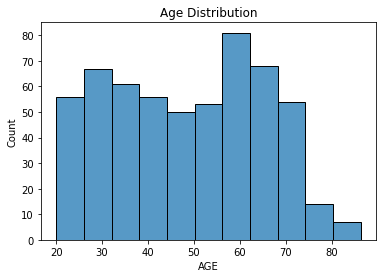

In [22]:
df_info_ixi(ixi)

In [23]:
ixi

,SEX,HEIGHT,WEIGHT,AGE,scan_site,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,Left-Amygdala,Left-Accumbens-area,Right-Lateral-Ventricle,Right-Thalamus,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area
0,2.0,164.0,58.0,35.800137,Guys,2.377,2.562,2.708,1.869,3.093,...,1588.1,335.7,3533.4,8419.4,3395.6,5213.0,2046.0,4032.7,1555.4,510.6
1,1.0,175.0,70.0,38.781656,HH,2.523,2.061,2.473,1.699,3.347,...,2223.3,587.9,6042.3,8274.0,3057.8,5009.7,1933.0,5581.7,2335.7,752.7
2,1.0,182.0,70.0,46.710472,HH,2.224,2.140,2.295,1.437,2.838,...,1531.9,431.6,6942.3,7686.3,3620.9,5094.1,2045.2,4499.2,1677.0,630.9
3,2.0,163.0,65.0,34.236824,HH,2.502,2.522,2.292,1.527,3.298,...,1385.4,514.9,4693.9,6776.2,3208.7,4216.2,1968.1,4511.0,1668.2,561.2
4,1.0,181.0,90.0,24.284736,HH,2.562,2.353,2.524,1.679,3.136,...,1638.1,494.0,6414.9,8242.4,4182.3,5340.1,2539.5,4167.9,1879.4,610.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1.0,193.0,120.0,47.723477,Guys,2.465,2.356,2.242,1.563,3.165,...,1378.4,316.8,10255.7,7158.3,3204.5,5481.3,2166.1,3755.7,1724.5,501.3
566,1.0,175.0,61.0,50.395619,Guys,2.271,2.517,2.448,1.827,3.507,...,1352.4,211.9,2415.3,7431.0,2754.4,4871.8,1908.5,4056.9,1516.2,351.6
567,1.0,163.0,80.0,42.989733,Guys,2.322,2.386,2.538,1.681,3.354,...,1714.0,417.8,6402.3,8418.7,2948.6,4578.8,2013.8,4355.9,1891.1,456.4
568,1.0,172.0,100.0,46.220397,Guys,2.565,2.358,2.551,1.946,2.903,...,1741.4,433.4,5126.2,7778.5,3564.6,4850.9,2413.0,4564.0,1773.6,522.1


In [27]:
y = ixi['AGE']
X = ixi.drop('AGE', axis = 1)

# 5 bins may be too few for larger datasets.
bins     = np.linspace(start=19.98, stop=86.32, num=5)
y_binned = np.digitize(y, bins, right=True)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, stratify=y_binned, shuffle = True, random_state = 1)

In [28]:
ixi_train = pd.concat([X_train, y_train], axis =1)
ixi_test = pd.concat([X_test, y_test], axis = 1)

shape :  (453, 163)
Min : 20.07
Max : 86.32
Range : 20.07 ~ 86.32
Median : 49.04
Standard Deviation : 16.50


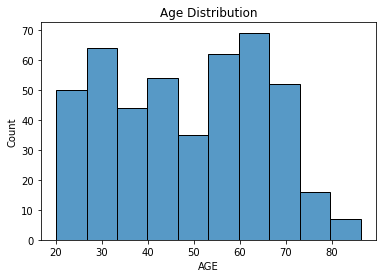

In [29]:
df_info_ixi(ixi_train)

shape :  (114, 163)
Min : 19.98
Max : 86.20
Range : 19.98 ~ 86.20
Median : 49.03
Standard Deviation : 16.26


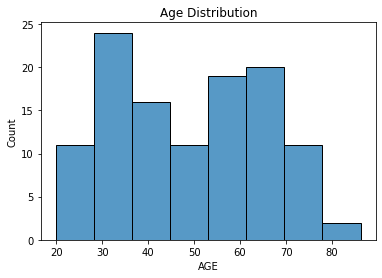

In [30]:
df_info_ixi(ixi_test)

In [31]:
ixi_train.to_csv('./integrated_data/ixi_train.csv')
ixi_test.to_csv('./integrated_data/ixi_test.csv')

In [1]:
import pandas as pd 
ixi_train = pd.read_csv('./integrated_data/ixi_train.csv')
ixi_test = pd.read_csv('./integrated_data/ixi_test.csv')

In [3]:
ixi_train['SEX'].value_counts()

2.0    253
1.0    200
Name: SEX, dtype: int64

In [4]:
ixi_test['SEX'].value_counts()

2.0    63
1.0    51
Name: SEX, dtype: int64

In [8]:
import pandas as pd 
cc_train = pd.read_csv('./integrated_data/CAMCAN_train.csv')
cc_test = pd.read_csv('./integrated_data/CAMCAN_test.csv')

In [10]:
cc_train['Sex'].value_counts()

2    251
1    249
Name: Sex, dtype: int64

In [11]:
cc_test['Sex'].value_counts()

2    51
1    50
Name: Sex, dtype: int64

In [12]:
import pandas as pd 
hcp_train = pd.read_csv('./integrated_data/hcp_train.csv')
hcp_test = pd.read_csv('./integrated_data/hcp_test.csv')

In [13]:
hcp_train['Sex'].value_counts()

2    487
1    403
Name: Sex, dtype: int64

In [14]:
hcp_test['Sex'].value_counts()

2    119
1    104
Name: Sex, dtype: int64